# ----------------------Network Intrusion Detection---------------------------------

In [175]:
# Import Models and libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest , chi2 , f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,FunctionTransformer,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [192]:
# Load the train & test data

df_train = pd.read_csv("Train_data.csv")

In [193]:
# top 5 rows of dataset

df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [194]:
# It check the null values in data

df_train.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [195]:
# Check the duplicated values of data

df_train.duplicated().sum()

0

In [196]:
# Look the some details of training data

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [197]:
### 

In [198]:
# Look the some statistics 

df_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [199]:
# Look the all inputs "object" Features
df_train.select_dtypes(include = "object").head()

,protocol_type,service,flag,class
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,anomaly
3,tcp,http,SF,normal
4,tcp,http,SF,normal


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


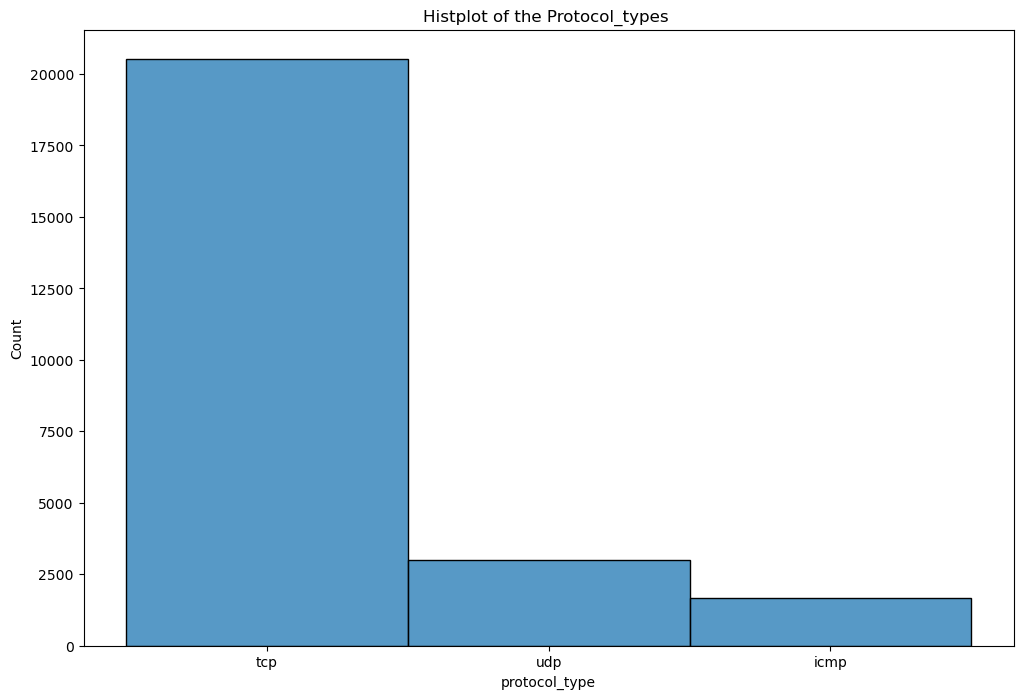

In [200]:
# In protocol_type tcp has more data udp and icmp has less data

plt.figure(figsize = (12,8))
plt.title("Histplot of the Protocol_types ")
sns.histplot(df_train["protocol_type"])
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


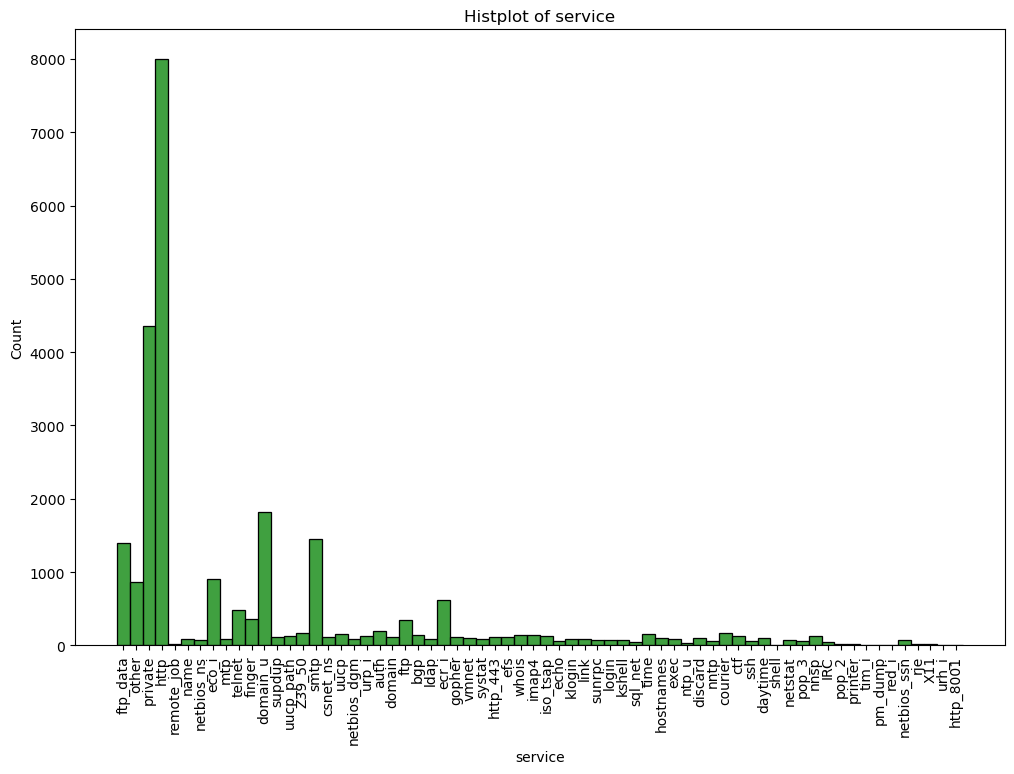

In [201]:
# In this histplot show the "http" more in service feature

plt.figure(figsize = (12,8))
plt.title("Histplot of service")
sns.histplot(df_train["service"],color = "green")
plt.xticks(rotation = 90)
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


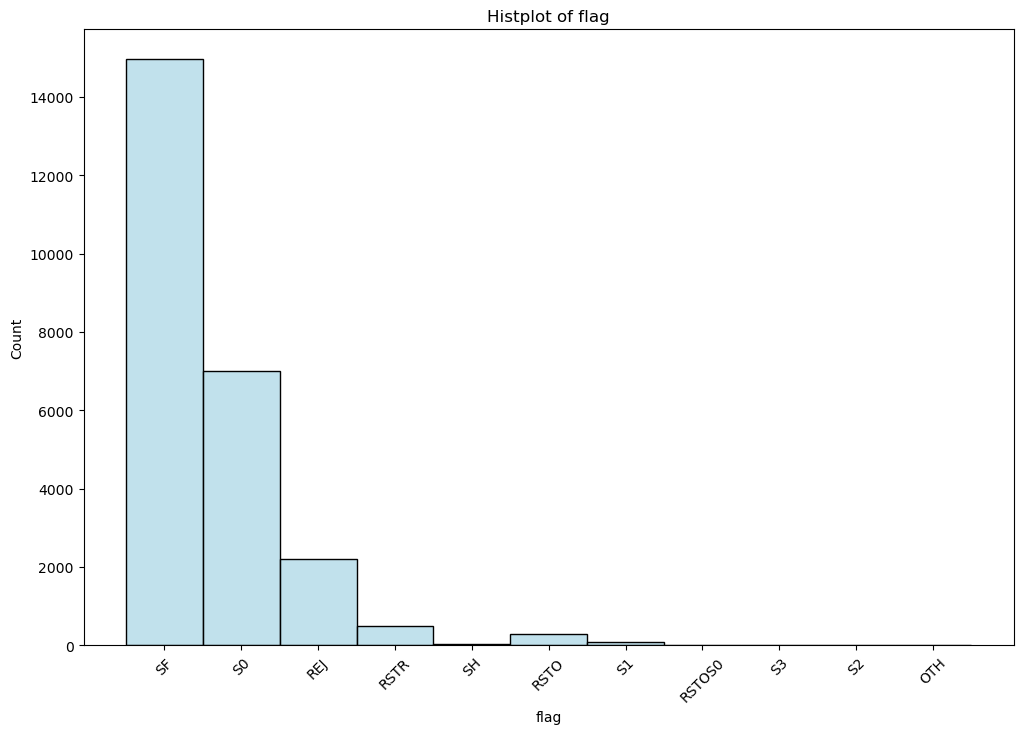

In [202]:
# It show the "SF" class have more data compare to all input data of Flag feature. 

plt.figure(figsize = (12,8))
plt.title("Histplot of flag")
sns.histplot(df_train["flag"],color = "lightblue")
plt.xticks(rotation = 45)
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


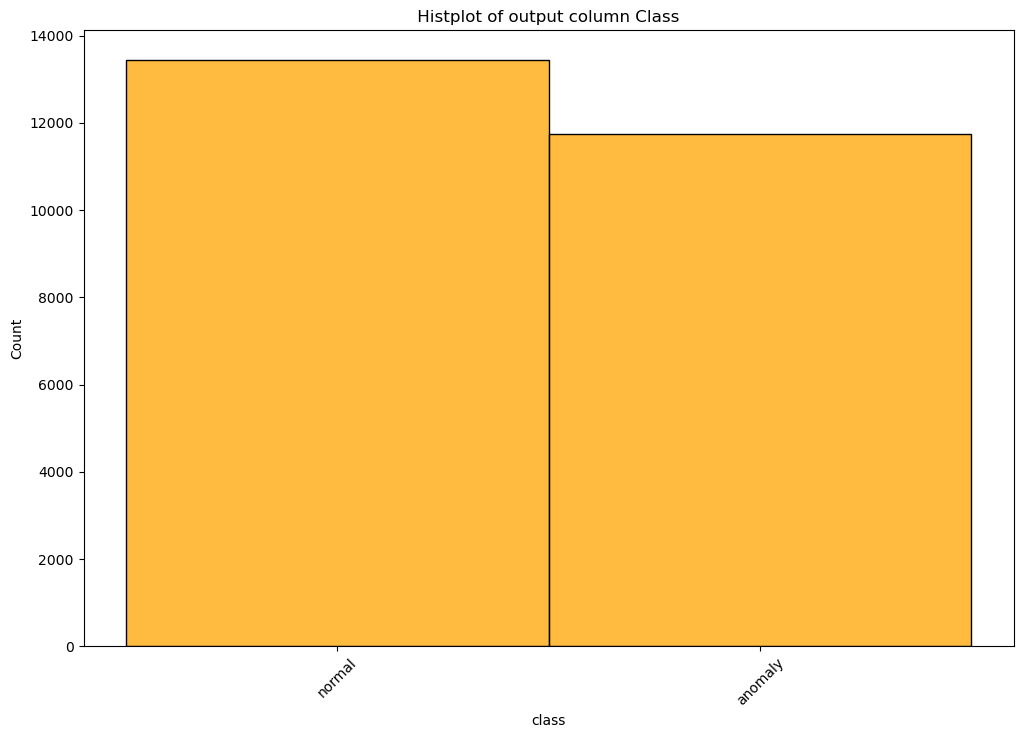

In [203]:
# It have balance classes in output columns 

plt.figure(figsize = (12,8))
plt.title(" Histplot of output column Class ")
sns.histplot(df_train["class"],color = "orange")
plt.xticks(rotation = 45)
plt.show()

In [204]:
# It show the all columns of dataset

df_train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [205]:
# It show the all numeric features of the train dataset

integer_features = df_train.select_dtypes(include = ["int","float"])

In [206]:
integer_features.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,491,0,0,0,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,146,0,0,0,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,0,0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,232,8153,0,0,0,0,0,1,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,199,420,0,0,0,0,0,1,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


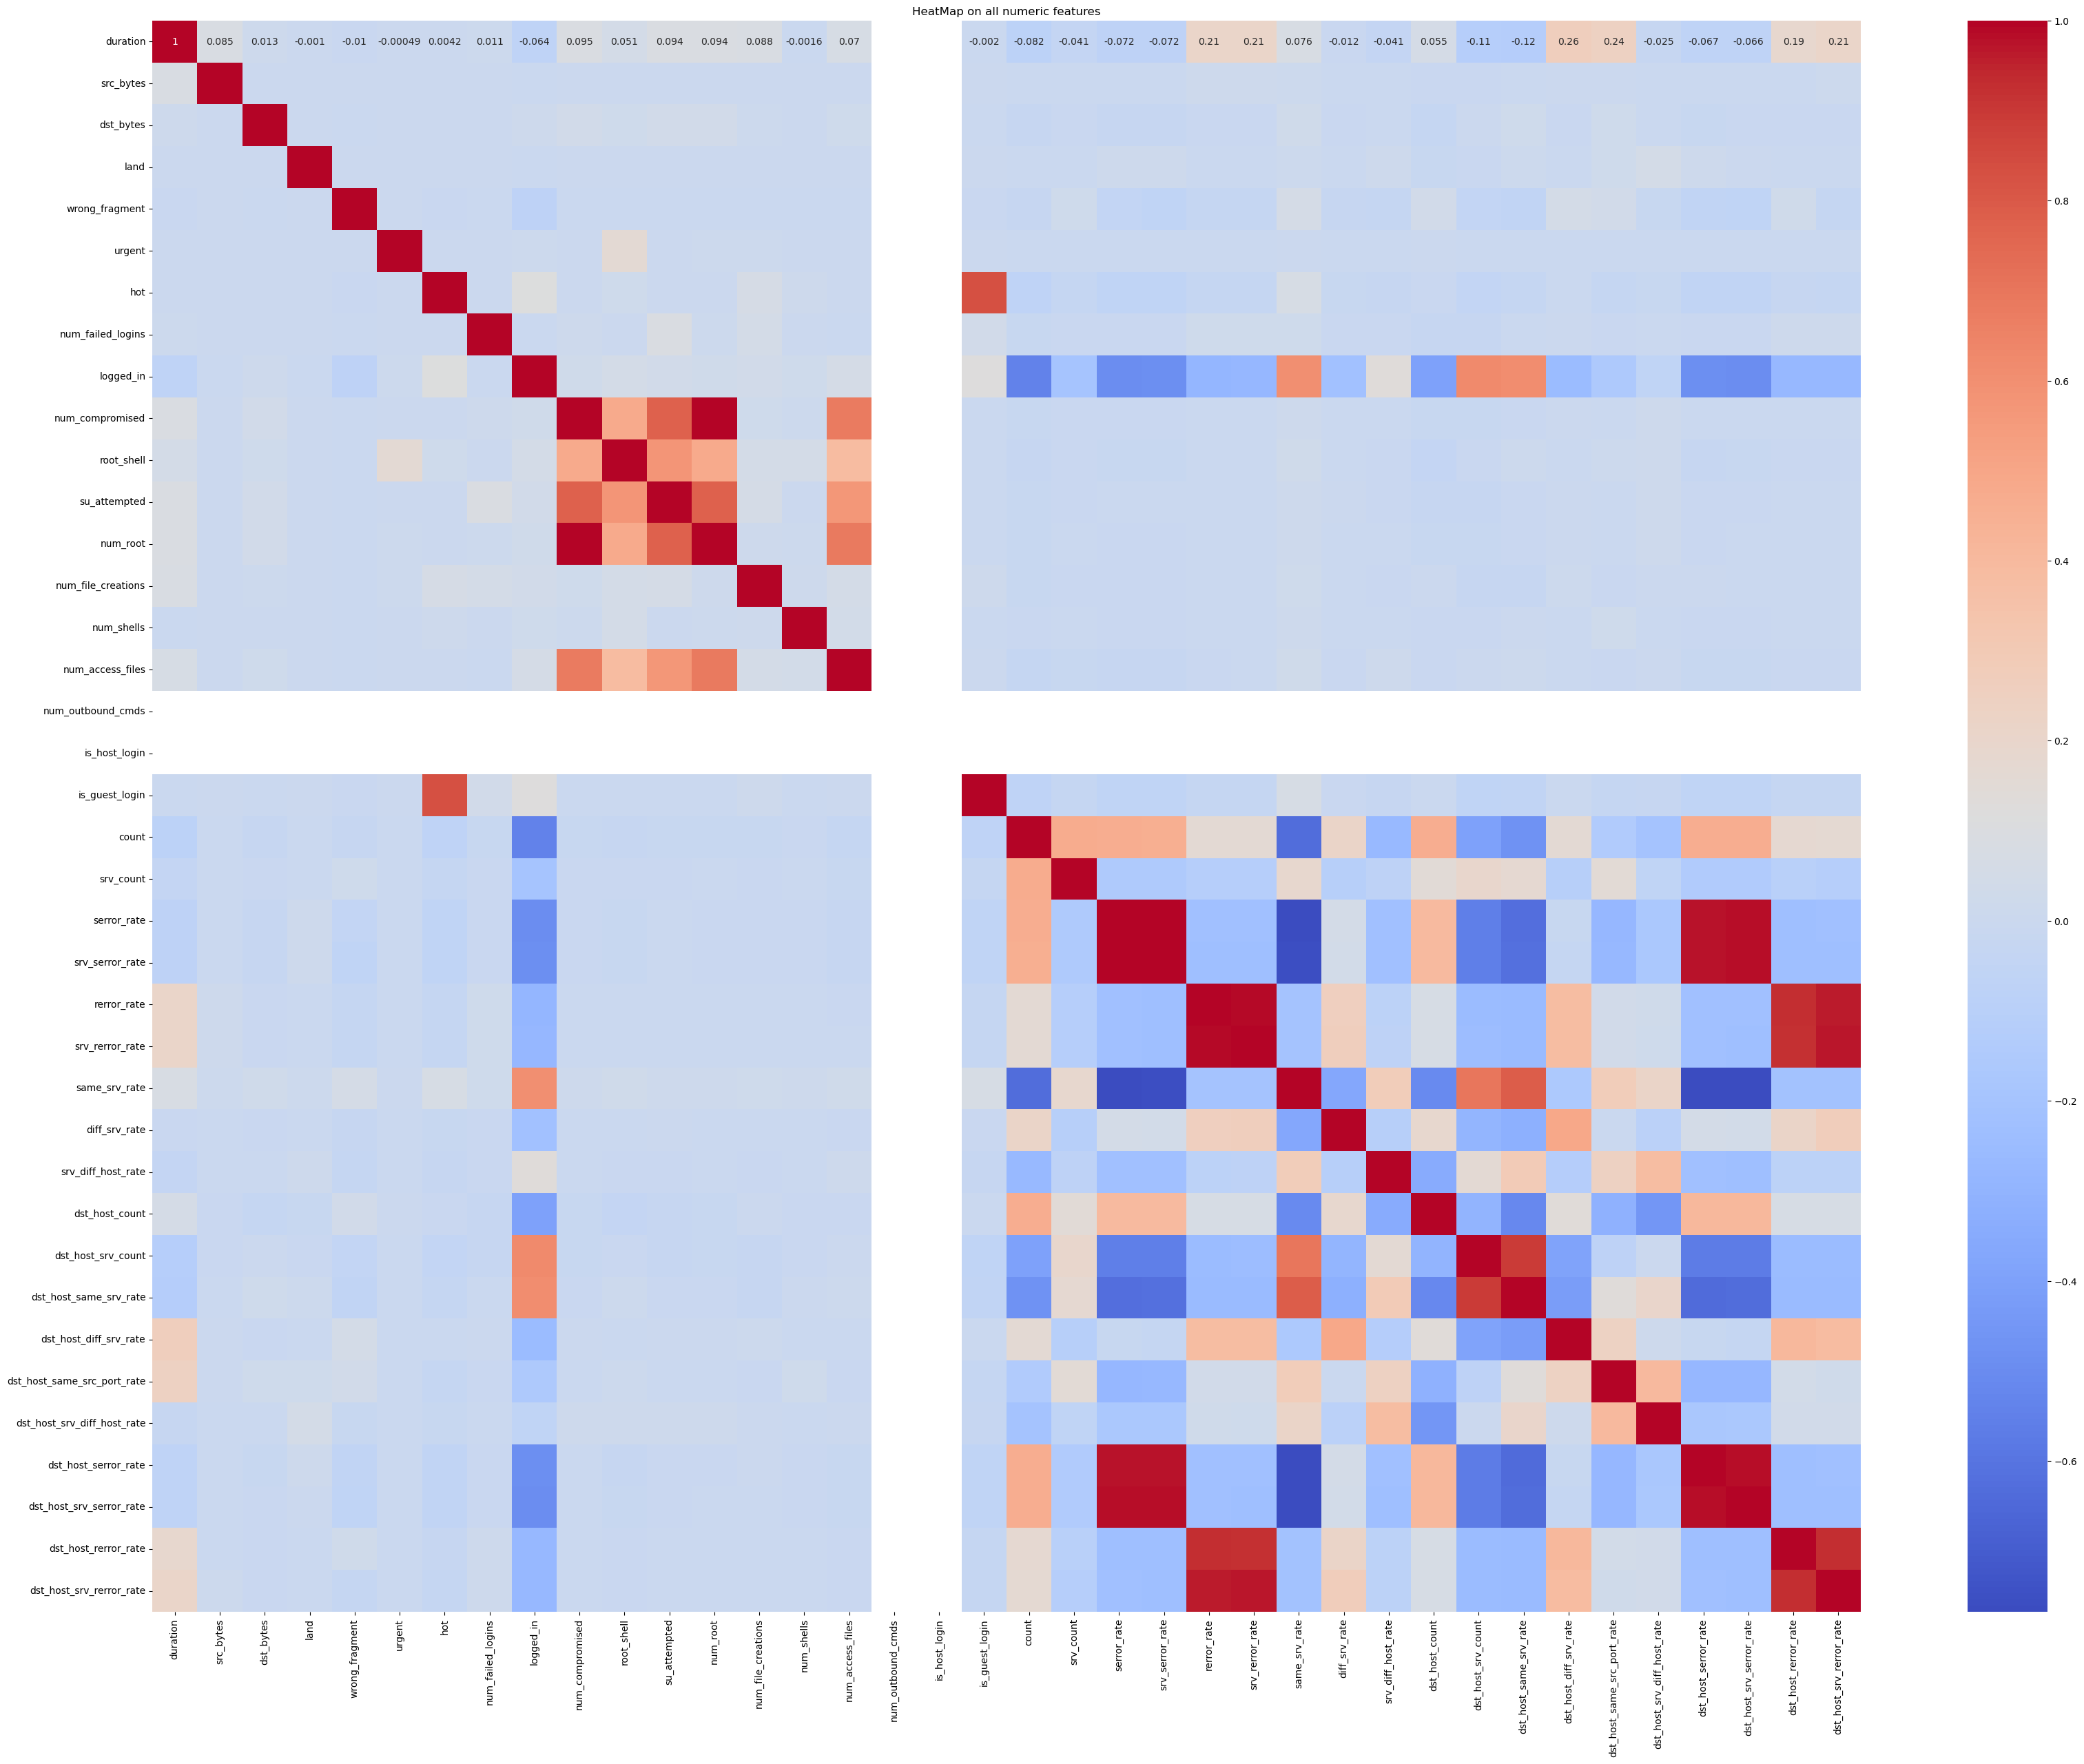

In [207]:
# It show the correlation between each columns  

numeric_df = df_train.select_dtypes(include='number')

plt.figure(figsize=(40, 30))
plt.title("HeatMap on all numeric features")
sns.heatmap(numeric_df.corr(), annot=True,cmap = "coolwarm")
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


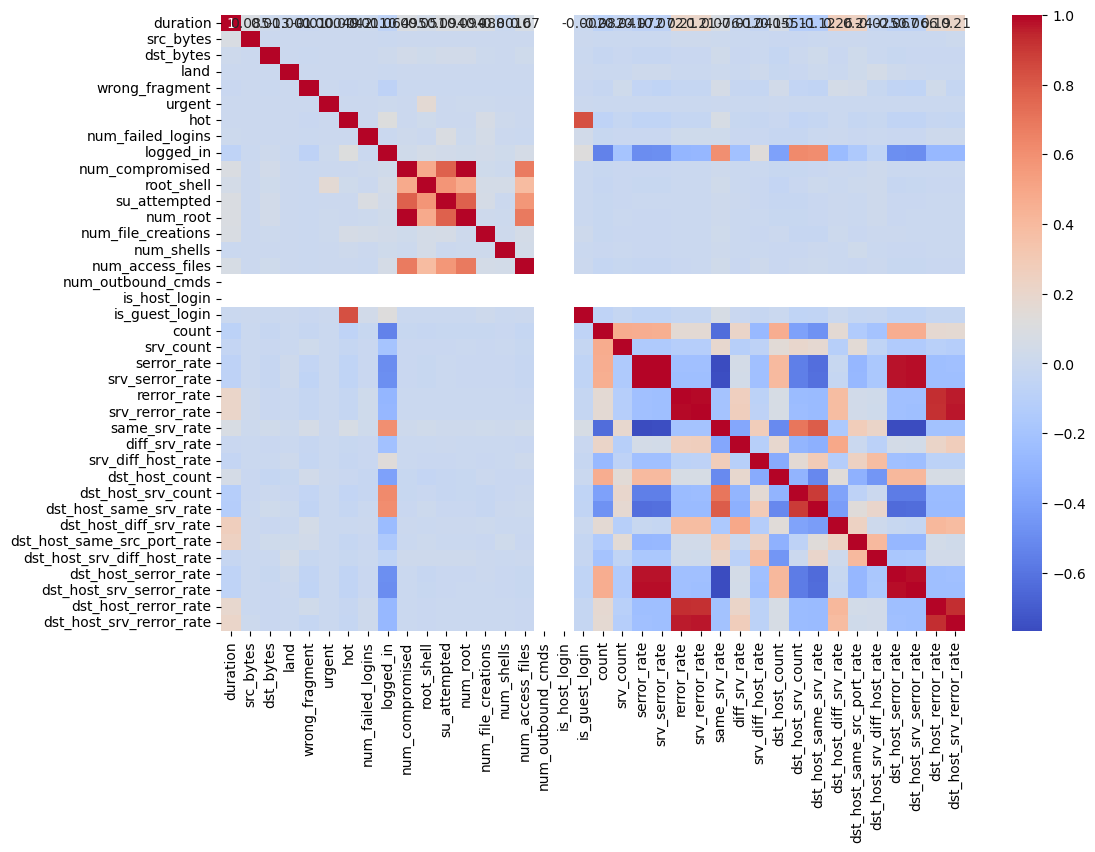

In [208]:
plt.figure(figsize = (12,8))
sns.heatmap(df_train.corr(numeric_only = True),annot = True,cmap = "coolwarm")
plt.show()

In [319]:
# Make the object of the LabelEncoder

lab = LabelEncoder()

In [210]:
df_train["class"] = lab.fit_transform(df_train["class"])

In [211]:
# Feature & Target Variable Separation

x = df_train.drop(columns = "class")
y = df_train["class"]

In [212]:
# Train_test_split steps

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [213]:
# It show the shape of the x_train, x_test, y_train, y_test

x_train.shape , y_train.shape , x_test.shape, y_test.shape

((20153, 41), (20153,), (5039, 41), (5039,))

In [320]:
# Select the only categorical input features

x_train.select_dtypes(include = "object").head()

,service,flag
2199,eco_i,SF
15288,private,S0
4139,other,SF
3505,private,S0
19281,bgp,S0


In [300]:
# Apply labelEncoder on all x_train categoricals features and y_train ,y_test on target column

"""preprocessor = ColumnTransformer(transformers=[
    ('protocol', FunctionTransformer(lab_protocol), x_train['protocol_type']),
    ('service', FunctionTransformer(lab_service), x_train['service']),
    ('flag', FunctionTransformer(lab_flag), x_train['flag']),
], remainder='passthrough')"""

"preprocessor = ColumnTransformer(transformers=[\n    ('protocol', FunctionTransformer(lab_protocol), x_train['protocol_type']),\n    ('service', FunctionTransformer(lab_service), x_train['service']),\n    ('flag', FunctionTransformer(lab_flag), x_train['flag']),\n], remainder='passthrough')"

In [302]:
# Apply labelEncoder on all x_train categoricals features and y_train ,y_test on target column

x_train["protocol_type"] = lab.fit_transform(x_train["protocol_type"])

In [303]:
# Apply labelEncoder on all x_test categorical features 

x_test["protocol_type"] = lab.transform(x_test["protocol_type"])

In [304]:
x_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
2199,0,0,eco_i,SF,8,0,0,0,0,0,...,1,143,1.00,0.00,1.00,0.5,0.0,0.0,0.0,0.0
15288,0,1,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.06,0.00,0.0,1.0,1.0,0.0,0.0
4139,0,1,other,SF,16787,0,0,0,0,0,...,20,1,0.05,0.20,0.85,0.0,0.0,0.0,0.0,0.0
3505,0,1,private,S0,0,0,0,0,0,0,...,255,11,0.04,0.08,0.00,0.0,1.0,1.0,0.0,0.0
19281,0,1,bgp,S0,0,0,0,0,0,0,...,255,24,0.09,0.05,0.00,0.0,1.0,1.0,0.0,0.0


In [305]:
x_train_sel = x_train[["protocol_type","duration","src_bytes","dst_bytes"]]
x_test_sel = x_test[["protocol_type","duration","src_bytes","dst_bytes"]]

In [306]:
# we not use one hot encoder because it have many null values
#one = OneHotEncoder(drop = "first" ,sparse_output =False)

In [307]:
#encode_train = one.fit_transform(x_train_sel[["protocol_type"]])
#encode_test = one.transform(x_test_sel[["protocol_type"]])

In [308]:
# df_train = pd.DataFrame(encode_train,columns = one.get_feature_names_out())
# df_test = pd.DataFrame(encode_test,columns = one.get_feature_names_out())

In [309]:
df.head()

,protocol_type_1,protocol_type_2
0,0.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [310]:
#x_train_sel_one = pd.concat([x_train_sel,df_train],axis = 1)
#x_test_sel_one = pd.concat([x_test_sel,df_test],axis = 1)

In [311]:
x_train_sel.head()

,protocol_type,duration,src_bytes,dst_bytes
2199,0,0,8,0
15288,1,0,0,0
4139,1,0,16787,0
3505,1,0,0,0
19281,1,0,0,0


In [312]:
x_test_sel.isna().sum()

protocol_type    0
duration         0
src_bytes        0
dst_bytes        0
dtype: int64

In [313]:
# Select the best 15 best features using ANOVA 

# select = SelectKBest(score_func=f_classif,k = 15)

In [314]:
# Fit the all input features in ANOVA and it select the best 15 feature from all features

#select.fit(x_train,y_train)

In [315]:
# Select the best columns from all features 

#x_train_sel = x_train[x_train.columns[select.get_support()]]

In [316]:
# See the all 15 best features

x_train_sel.head()

,protocol_type,duration,src_bytes,dst_bytes
2199,0,0,8,0
15288,1,0,0,0
4139,1,0,16787,0
3505,1,0,0,0
19281,1,0,0,0


In [317]:
# Select the 15 best features from x_test all features 

#x_test_sel = x_test[x_test.columns[select.get_support()]]

In [252]:
# see the top 5 row and 15 best selected features

x_test_sel.head()

,protocol_type,duration,src_bytes,dst_bytes
19064,0,0,1032,0
11127,1,0,0,0
6517,1,0,0,0
2973,2,0,45,114
13339,1,0,0,0


## ----------------------------Start model training-----------------------

In [253]:
# Making the object of LogisticRegression

lr = LogisticRegression()

In [257]:
# Train the LogisticRegression on selected features

lr.fit(x_train_sel,y_train)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [258]:
# Apply prediction on training data and testing data to check the overfitting or underfitting

y_pred_train = lr.predict(x_train_sel)
y_pred_test = lr.predict(x_test_sel)

In [259]:
# check the accuracy_score of the training and testing data

print("Accuracy of train = ",accuracy_score(y_pred_train,y_train))
print("Accuracy of test=",accuracy_score(y_test,y_pred_test))

Accuracy of train =  0.5383317620205429
Accuracy of test= 0.5348283389561421


In [260]:
# Making the object of the DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [261]:
# It for all features of the dataset 

# dt.fit(x_train,y_train)

In [262]:
# It check the all features accuracy without any feature selection

#y_pred_all_featrues = dt.predict(x_test)
#print("Accuracy_score = ",accuracy_score(y_pred_all_featrues,y_test))

In [263]:
# It train the model after featureSelection

dt.fit(x_train_sel,y_train)

DecisionTreeClassifier()

In [264]:
# Apply prediction on the selected feature of the x_train and x_test

y_pred_train = dt.predict(x_train_sel)
y_pred_test = dt.predict(x_test_sel)

In [265]:
# Check the accuracy_score on the training data and test data

print("Accuracy of Train data = ",accuracy_score(y_train,y_pred_train))
print("Accuracy of Test data = ",accuracy_score(y_test,y_pred_test))

Accuracy of Train data =  0.9742966307745745
Accuracy of Test data =  0.9740027783290336


In [266]:
# MAking the object of the RandomForestClassifier

rd = RandomForestClassifier()

In [267]:
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# sfs = SFS(rd,k_features="best",forward = False,floating = False,scoring = "accuracy",cv = 2)

In [268]:
# sfs.fit(x_train,y_train)

In [269]:
# print(sfs.k_feature_names_)

In [270]:
# This model train for all featrues of the x_train data 

#rd.fit(x_train,y_train)

In [271]:
# Check the accuracy of the x_train all features

#y_pred_all_features = rd.predict(x_test)
#print("Accuracy_score = ",accuracy_score(y_test,y_pred_all_featrues))

In [272]:
# this model for after feature selection

rd.fit(x_train_sel,y_train)

RandomForestClassifier()

In [273]:
# this model for after feature selection

y_pred_train = rd.predict(x_train_sel)
y_pred_test = rd.predict(x_test_sel)

In [274]:
# Check the accuracy score of the selected features of x_train and x_test

print("Accuracy_score = ",accuracy_score(y_train,y_pred_train))
print("Accuracy_score = ",accuracy_score(y_test,y_pred_test))

Accuracy_score =  0.9742966307745745
Accuracy_score =  0.9742012304028577


In [275]:
# MAking the object of the SupportVectorMachine

svc = SVC()

In [276]:
# train the model on selected feature

svc.fit(x_train_sel,y_train)

SVC()

In [277]:
# Apply prediction on the x_train_sel and x_test_sel

y_pred_train = svc.predict(x_train_sel)
y_pred_test = svc.predict(x_test_sel)

In [278]:
# Check the accuracy score on the traing and testing data 

print("Accuracy_score = ",accuracy_score(y_train,y_pred_train))
print("Accuracy_score = ",accuracy_score(y_test,y_pred_test))

Accuracy_score =  0.5352552969781174
Accuracy_score =  0.5314546537011312


In [279]:
# Make the object of the GaussianNB

gnb = GaussianNB()

In [280]:
# train the model on all features of the dataset

# gnb.fit(x_train,y_train)

In [281]:
# Check the accuracy score of the GaussianNB

#y_pred_all_features = gnb.predict(x_test)
#print("Accuracy_score = ",accuracy_score(y_test,y_pred_all_features))

In [282]:
# Train the model on the selected features

gnb.fit(x_train_sel,y_train)

GaussianNB()

In [283]:
# Apply prediction on selected features of training and testing data

y_pred_train = gnb.predict(x_train_sel)
y_pred_test = gnb.predict(x_test_sel)

In [284]:
# Check the accuracy Score of the training and testing data 

print("Accuracy_score = ",accuracy_score(y_train,y_pred_train))
print("Accuracy_score = ",accuracy_score(y_test,y_pred_test))

Accuracy_score =  0.5324269339552424
Accuracy_score =  0.5296685850367137


In [285]:
# Make the object of the MultinomialNB

mnb = MultinomialNB()

In [286]:
# train the model on all features of the training data

#mnb.fit(x_train,y_train)

In [287]:
# Check tthe accuray score of the model on all features of training and testing data

#y_pred_train_all_features = mnb.predict(x_train)
#y_pred_all_featrues = mnb.predict(x_test)
#print("Accuracy_Score of train = ",accuracy_score(y_train,y_pred_train_all_features))
#print("Accuracy_Score of test = ",accuracy_score(y_test,y_pred_all_featrues))

In [288]:
# Train the model on selected features of training and testing data

mnb.fit(x_train_sel,y_train)

MultinomialNB()

In [289]:
# Apply prediction on training and testing data on seleted features

y_pred_train = mnb.predict(x_train_sel)
y_pred_test = mnb.predict(x_test_sel)

In [290]:
# Check the accuracy Score on the training and testing data

print("Accuracy_Score = ",accuracy_score(y_train,y_pred_train))
print("Accuracy_Score = ",accuracy_score(y_test,y_pred_test))

Accuracy_Score =  0.5335185828412643
Accuracy_Score =  0.5278825163722961


In [291]:
# Making the object of the XGBClassifier

xgb = XGBClassifier()

In [292]:
# Train the model on all features data of the x_train 

#xgb.fit(x_train,y_train)

In [293]:
# Check the accuracy of the model

#y_pred_train_ll_features = xgb.predict(x_train)
#print("Accuracy Score = ",accuracy_score(y_train,y_pred_train_all_features))

In [294]:
# Train the model with selected feaures of the training data

xgb.fit(x_train_sel,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [295]:
# Check the accuracy score of the training and testing data

y_pred_test = xgb.predict(x_test_sel)
y_pred_train = xgb.predict(x_train_sel)
print("Accuracy score Train= ",accuracy_score(y_train,y_pred_train))
print("Accuracy score Test = ",accuracy_score(y_test,y_pred_test))
print("Classificaiton Report = ",classification_report(y_test,y_pred_test))

Accuracy score Train=  0.9732049818885525
Accuracy score Test =  0.9740027783290336
Classificaiton Report =                precision    recall  f1-score   support

           0       0.95      1.00      0.97      2365
           1       1.00      0.95      0.97      2674

    accuracy                           0.97      5039
   macro avg       0.97      0.98      0.97      5039
weighted avg       0.98      0.97      0.97      5039



In [297]:
import pickle 
with open("xgb.pkl","wb") as f:
    pickle.dump(xgb,f)

In [318]:
with open("Encoder.pkl","wb") as f:
    pickle.dump(lab,f)